<a href="https://colab.research.google.com/github/Chirag314/Time-series-forecasting/blob/main/Bitcoin_time_series_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download bitcoin historical data from Github
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-03-21 06:15:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2022-03-21 06:15:25 (10.6 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
# Import data
import pandas as pd
df= pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                parse_dates=['Date'],
                index_col=['Date'])

In [ ]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
#Only want closing price for each day
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


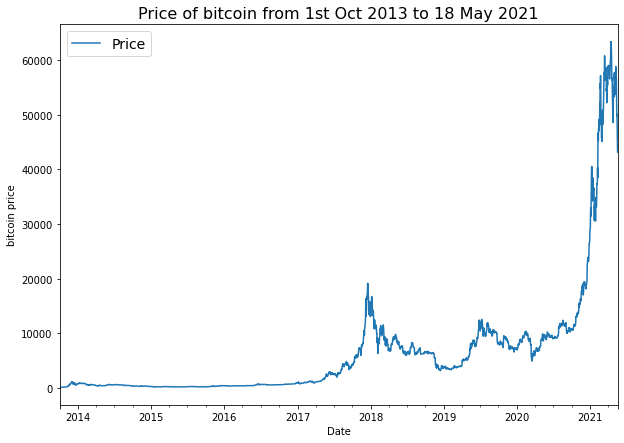

In [ ]:
#plot data
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("bitcoin price")
plt.title("Price of bitcoin from 1st Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14)


In [ ]:
# Import data in python
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "r") as f:
  csv_reader =csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],'%Y-%m-%d'))
    btc_price.append(float(line[2]))
  
timesteps[:10], btc_price[:10]


([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0, 0.5, 'BTC price')

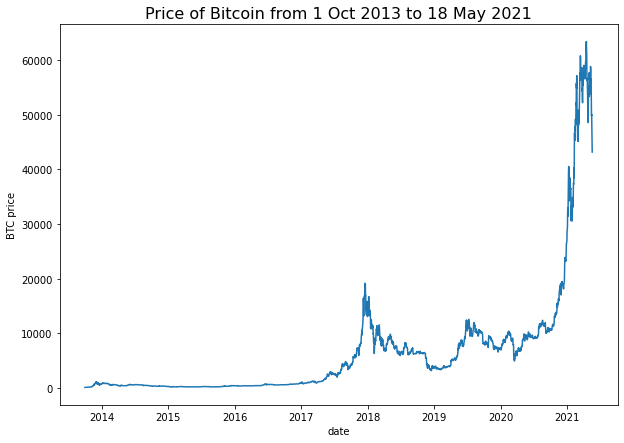

In [ ]:
# plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("date")
plt.ylabel("BTC price")

In [ ]:
#get bitcon data array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()
# Create test and train data splits
split_size = int(0.8 * len(prices))

# train data
x_train, y_train = timesteps[:split_size],prices[:split_size]
# test data
x_test, y_test =  timesteps[split_size:],prices[split_size:]

len(x_train), len(x_test), len(y_train),len(y_test)

(2229, 558, 2229, 558)

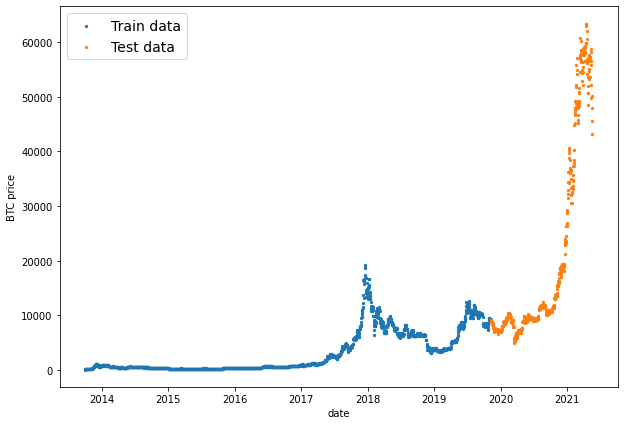

In [ ]:
# Visulize the data
plt.figure(figsize=(10,7))
plt.scatter(x_train, y_train, s=5, label='Train data')
plt.scatter(x_test, y_test,s=5,label='Test data')
plt.xlabel("date")
plt.ylabel("BTC price")
plt.legend(fontsize=14)
plt.show()

In [ ]:
# Create a finction to plot the time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label =None):
  plt.plot(timesteps[start:end], values[start:end],format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

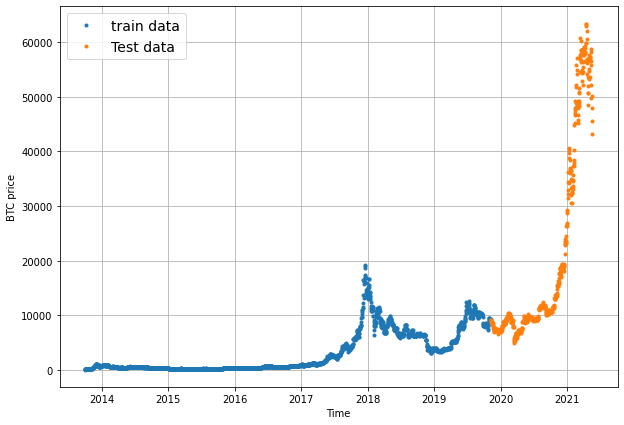

In [ ]:
# Try the function
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train, values=y_train, label='train data')
plot_time_series(timesteps=x_test, values=y_test, label='Test data')

In [ ]:
#Create naive forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]


(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

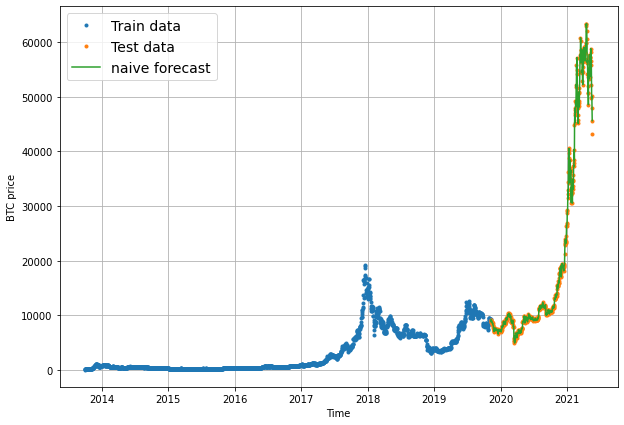

In [ ]:
#Plot naive forecast
plt.figure(figsize=(10,7))
plot_time_series(timesteps=x_train, values=y_train, label="Train data")
plot_time_series(timesteps=x_test, values=y_test, label='Test data')
plot_time_series(timesteps=x_test[1:], values=naive_forecast,format='-',label='naive forecast')

In [ ]:
import tensorflow as tf

# MASE
def mean_absolute_scaled_error(y_true, y_pred):
  mae=tf.reduce_mean(tf.abs(y_true-y_test))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))
  return mae/mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

In [ ]:
len(y_test[1:]),len(naive_forecast)
y_t=y_test[1:]
naive_results = evaluate_preds(y_true=y_t , y_pred = naive_forecast)

InvalidArgumentError: ignored

In [ ]:
tf.reduce_mean(y_test).numpy()

20056.632963737226

In [ ]:
horizon =1
window_size =7


In [ ]:
# Create a function to label windowed data
def get_labelled_windows(x, horizon=1):
  return x[:,:-horizon], x[:,-horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1,axis=0),horizon=horizon)
print(f"window : {tf.squeeze(test_window).numpy()} -> label : {tf.squeeze(test_label).numpy()}")

window : [1 2 3 4 5 6 7] -> label : 8


In [ ]:
def make_windows(x, window_size =7, horizon=1):
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)- (window_size+horizon-1)), axis=0).T
  windowed_array = x[window_indexes]
  windows, labels = get_labelled_windows(windowed_array, horizon = horizon)
  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size =window_size, horizon =horizon)
len(full_windows), len(full_labels)

(2780, 2780)

In [ ]:
# View first 3 windows/labels
for i in range(3):
  print(f"Window : {full_windows[i]}-> Label : {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]-> Label : [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]-> Label : [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]-> Label : [125.96116]


In [ ]:
# Turning windowed data into train/test split
def make_train_test_splits(windows, labels, test_split=0.2):
  split_size = int(len(windows)*(1-test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels =labels[split_size:]
  return train_windows, test_windows,train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
train_windows[:5],train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]), array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

In [ ]:
# Save model check point for best model
import os

def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoing(filepath=os.path.join(save_path,model_name),
                                            verbose=0,
                                            save_best_only=True)